In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
net=pd.read_csv("netflix_titles.csv")
net.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
net.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

# DATA CLEANING

In [4]:
net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
net["date_added"]=pd.to_datetime(net["date_added"])
net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


description column seems not useful for this analysis and listed_in column is referred to as categories on netflix .

In [6]:
net= net.drop("description", axis= 'columns')
net["categories"]=net["listed_in"]
net=net.drop("listed_in",axis='columns')


In [7]:
net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  categories    8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 757.0+ KB


In [8]:
net.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
categories         0
dtype: int64

we need to replace the null values in the datasets. 
the date_added column values are being arranged accordingly, therefore we can down fill empty values downward. The country column can simply be filled with world and the remaining columns are filled with unknow 

In [9]:
net["director"]=net["director"].fillna("unknow")
net["cast"]=net["cast"].fillna("unknow")
net["country"]=net["country"].fillna("world")
net["rating"]=net["rating"].fillna("unknow")
net["duration"]=net["duration"].fillna("unknow")
net["date_added"]=net["date_added"].ffill()

In [10]:
net.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
categories      0
dtype: int64

In [11]:
net["month"]= net["date_added"].dt.month
net["year"]=net["date_added"].dt.year
net["month name"]= net["month"].replace({1: "January",2: "February",3:"March",4:"April",
                                         5:"May",6:"June",7:"July",8:"August",9:"September",
                                        10:"October",11:"November",12:"December"})

In [12]:
net=net.drop("month",axis='columns')

In [13]:
net.duplicated().value_counts()

False    8807
dtype: int64

In [14]:
net["title"].duplicated().value_counts()

False    8807
Name: title, dtype: int64

no entries was repeated twice and no title was repeated twice

In [15]:
net.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,categories,year,month name
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknow,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,September
1,s2,TV Show,Blood & Water,unknow,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021,September
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",world,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,September
3,s4,TV Show,Jailbirds New Orleans,unknow,unknow,world,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",2021,September
4,s5,TV Show,Kota Factory,unknow,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",2021,September
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",world,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021,September
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",world,2021-09-24,2021,PG,91 min,Children & Family Movies,2021,September
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021,September
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",2021,September
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",2021,September


DATA EXPLORATION AND ANALYSIS

In [16]:
## 1. MOST ADDED AND RELEASED type across the world

In [17]:
net["type"].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

<AxesSubplot:title={'center':'Ratio of different type'}, ylabel='type'>

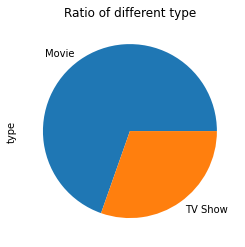

In [18]:
net["type"].value_counts().plot(kind='pie', title='Ratio of different type')

In [19]:
##2. TOP 10 DIRECTORS ACROSS THE WORLD

In [20]:
director_10=net["director"].value_counts()[:11]
director_10=director_10.drop("unknow")
director_10

Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
Jay Chapman               12
Martin Scorsese           12
Steven Spielberg          11
Name: director, dtype: int64

<AxesSubplot:title={'center':'Top 10 directors of movies'}>

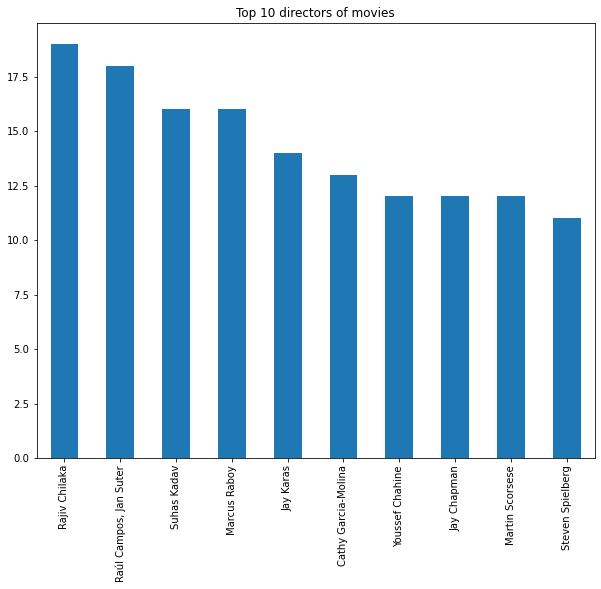

In [21]:
director_10.plot(kind='bar',figsize=(10,8),title='Top 10 directors of movies')

In [22]:
## 3. TOP 10 COUNTRIES IN RELEASING TO NETFLIX 

In [23]:
country_10=net["country"].value_counts()[:11]
country_10=country_10.drop("world")
country_10

United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: country, dtype: int64

<AxesSubplot:title={'center':'Top 10 countries where movie are produced'}>

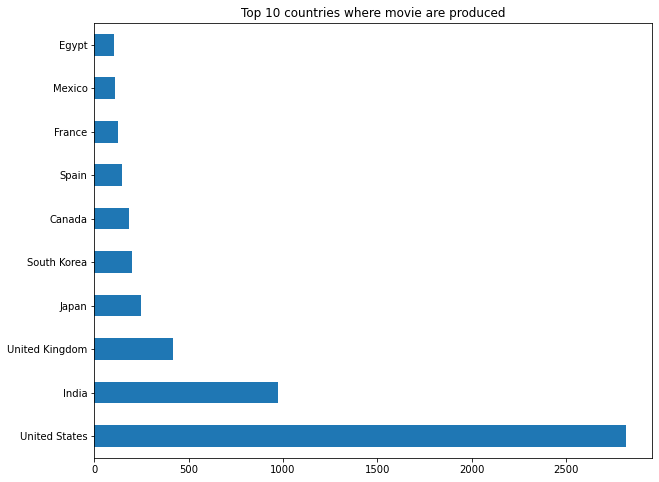

In [24]:
country_10.plot(kind='barh', figsize=(10,8), title= 'Top 10 countries where movie are produced')

In [25]:
## 4. NUMBER OF RELEASE FOR EACH YEAR

In [26]:
release_year=net["release_year"].value_counts()
release_year=pd.DataFrame(release_year)
release_year=release_year.sort_index(ascending=True)
release_year=release_year.rename_axis('year1').reset_index()
release_year

,year1,release_year
0,1925,1
1,1942,2
2,1943,3
3,1944,3
4,1945,4
...,...,...
69,2017,1032
70,2018,1147
71,2019,1030
72,2020,953


<AxesSubplot:title={'center':'total released by year'}, xlabel='year1'>

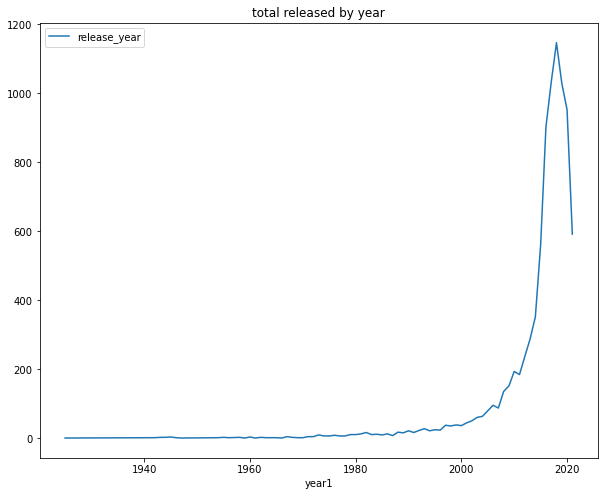

In [27]:
release_year.plot(kind='line',x='year1',y='release_year',figsize=(10,8),title='total released by year')

In [28]:
## 5. NUMBER OF RELEASE FOR EACH YEAR IN THE 20TH CENTURY

In [29]:
release_year2=net["release_year"].value_counts()
release_year2
release_year2=pd.DataFrame(release_year2)
release_year2
release_year2=release_year2.rename_axis("year").reset_index()
release_year2=release_year2.sort_values("year")
release_year2=release_year2.iloc[-22:,]
release_year2

,year,release_year
23,2000,37
20,2001,45
19,2002,51
18,2003,61
17,2004,64
16,2005,80
14,2006,96
15,2007,88
13,2008,136
12,2009,152


<AxesSubplot:title={'center':'number of release for the 20th century'}, xlabel='year'>

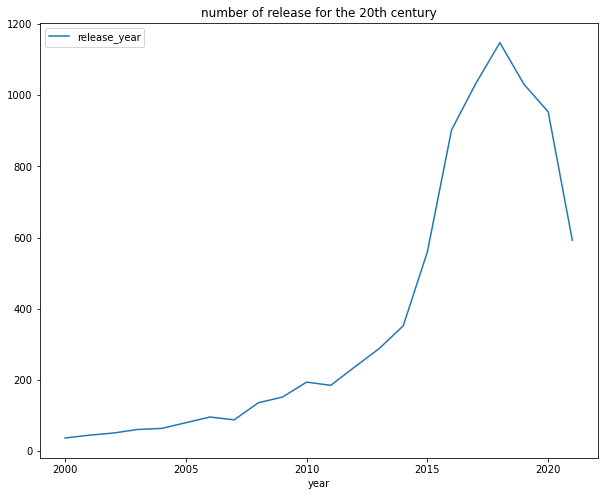

In [30]:
release_year2.plot(kind='line',x='year',y='release_year',figsize=(10,8),title="number of release for the 20th century")

In [31]:
## 6. NUMBER OF ADDED TYPE TO NETFLIX SINCE 2008

In [32]:
year=net["year"].value_counts()
year=pd.DataFrame(year)
year=year.sort_index(ascending=True)
year2=year.rename_axis('year1').reset_index()
year2

,year1,year
0,2008,2
1,2009,2
2,2010,1
3,2011,13
4,2012,3
5,2013,11
6,2014,24
7,2015,82
8,2016,430
9,2017,1193


<AxesSubplot:title={'center':'total added to netflix by year'}, xlabel='year1'>

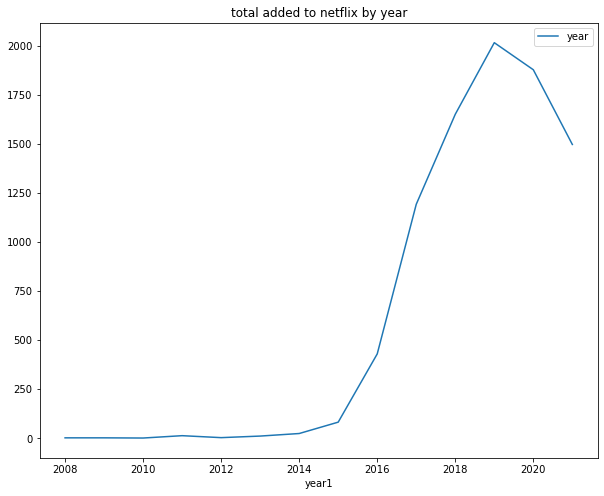

In [33]:
year2.plot(kind='line',x='year1',y='year',figsize=(10,8),title='total added to netflix by year')

In [34]:
## 7. NUMBER OF ADDED TYPE TO NETFLIX BY MONTHS

In [35]:
month=net["month name"].value_counts()
month
month=pd.DataFrame(month)

month=month.rename_axis('monthname').reset_index()
month["monthnumber"]= month["monthname"].replace({"January":1, "February" :2,"March":3,"April":4,
                                          "May":5, "June":6, "July":7, "August":8, "September":9,
                                         "October":10,"November":11,"December":12})
month=month.sort_values("monthnumber")
month

,monthname,month name,monthnumber
7,January,738,1
11,February,565,2
6,March,743,3
3,April,765,4
10,May,634,5
8,June,729,6
0,July,827,7
5,August,755,8
2,September,772,9
4,October,761,10


<AxesSubplot:title={'center':'total added to netflix by month'}, xlabel='monthname'>

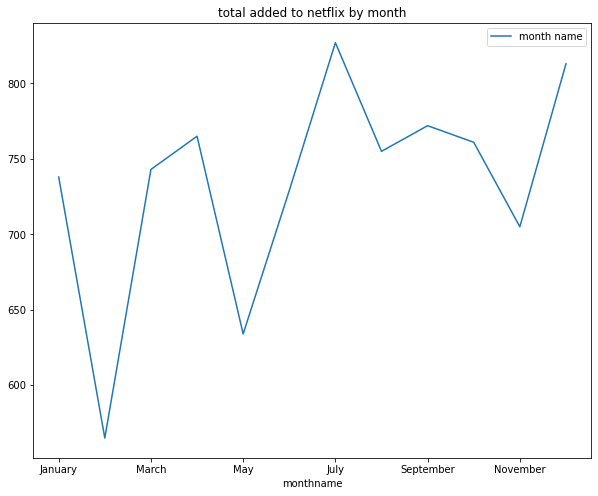

In [36]:
month.plot(kind='line', x="monthname",y="month name", figsize=(10,8),title='total added to netflix by month')

In [37]:
## 8. NUMBER OF ADDED TYPE TO NETFLIX BY FONTH FOR THE LAST 4 YEARS (2018,2019,2020,2021) RESPECTIVELY


The years are : 2018,2019,2020,2021  respectively


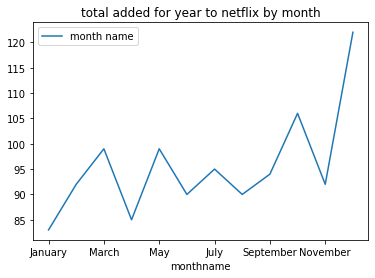

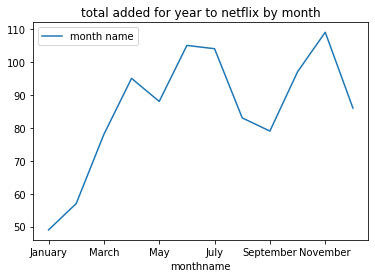

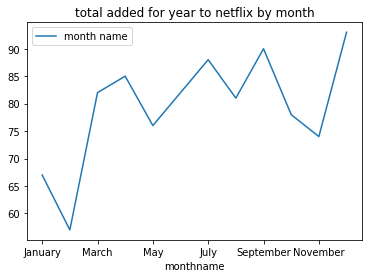

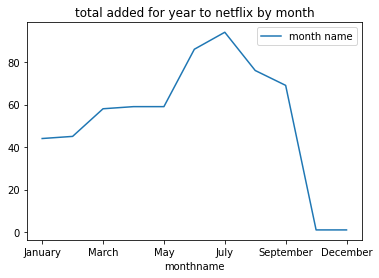

In [38]:
print("The years are : 2018,2019,2020,2021  respectively")
for i in (2018,2019,2020,2021):
    yeari=net.where(net["release_year"]==i)
    yeari=yeari["month name"].value_counts()
    yeari=pd.DataFrame(yeari)
    
    yeari=yeari.rename_axis('monthname').reset_index()
    yeari["monthnumber"]= yeari["monthname"].replace({"January":1, "February" :2,"March":3,"April":4,
                                          "May":5, "June":6, "July":7, "August":8, "September":9,
                                         "October":10,"November":11,"December":12})
    yeari=yeari.sort_values("monthnumber")
    
    yeari.plot(kind='line', x="monthname",y="month name",title='total added for year to netflix by month')


In [39]:
## 9.  RATING OF NETFLIX RELEASE 

In [40]:
rating_number=net["rating"].value_counts()
rating_number=pd.DataFrame(rating_number)
print("number of rows is : ",rating_number.size)

number of rows is :  18


In [41]:
top_ratings= rating_number.iloc[0:8,]
low_ratings= rating_number.iloc[9:,]


<AxesSubplot:title={'center':'less common ratings'}>

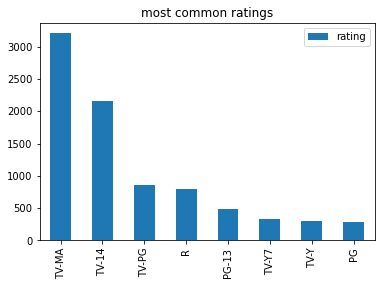

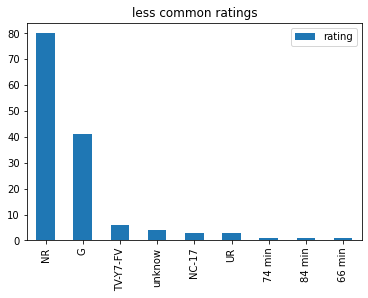

In [42]:
top_ratings.plot(kind="bar",title="most common ratings")
low_ratings.plot(kind="bar",title="less common ratings")

In [43]:
## 10. TOP 10 NETFLIX DURATION

<AxesSubplot:title={'center':'most released duration type'}, xlabel='duration_type'>

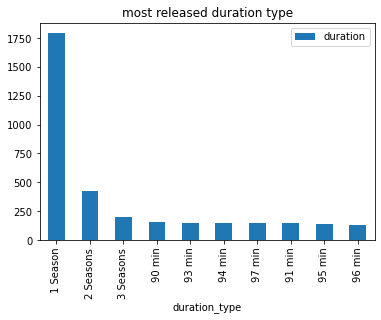

In [44]:
count=net["duration"].value_counts()[:10]
duration=pd.DataFrame(count)
duration=duration.rename_axis("duration_type").reset_index()
duration.plot(kind="bar",x="duration_type",y="duration",title="most released duration type")

In [45]:
## 11. CATEGORIES OF NETFLIX RELEASE

In [46]:

category_split=net["categories"].str.split(",")

In [47]:
category_split=category_split.value_counts()[:10]
category_split=pd.DataFrame(category_split)
category_split

,categories
"[Dramas, International Movies]",362
[Documentaries],359
[Stand-Up Comedy],334
"[Comedies, Dramas, International Movies]",274
"[Dramas, Independent Movies, International Movies]",252
[Kids' TV],220
[Children & Family Movies],215
"[Children & Family Movies, Comedies]",201
"[Documentaries, International Movies]",186
"[Dramas, International Movies, Romantic Movies]",180


<AxesSubplot:title={'center':'top categories shows belong'}>

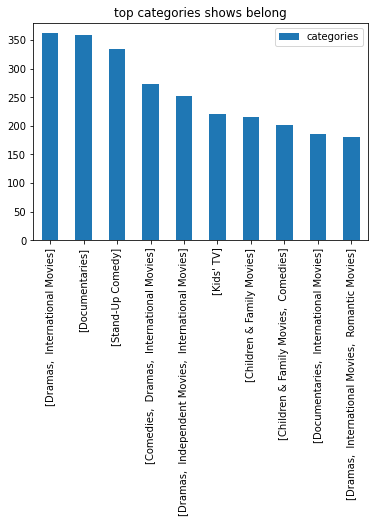

In [48]:
category_split.plot(kind='bar',title="top categories shows belong")

In [49]:
##  TYPE RELEASED FOR EACH years

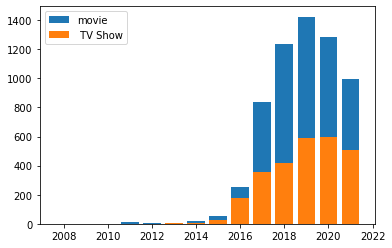

In [50]:
typeyear=net[ ["type","year"]]
movie=typeyear.where(typeyear["type"]=="Movie")
tv_show=typeyear.where(typeyear["type"]=="TV Show")
movie=movie["year"].value_counts()
movie=pd.DataFrame(movie)
movie=movie.rename_axis("exact year").reset_index()
movie=movie.sort_values("exact year")
tv_show=tv_show["year"].value_counts()
tv_show=pd.DataFrame(tv_show)

tv_show=tv_show.rename_axis("exact year").reset_index()
tv_show=tv_show.sort_values("exact year")

plt.bar(movie["exact year"],movie["year"],label="movie")
plt.bar(tv_show["exact year"],tv_show["year"],label=" TV Show")
plt.legend()
plt.show()

In [51]:
## tOP 10 COUNTRIES FOR EACH TYPE

In [52]:

typecount=net[["type", "country"]]
movie=typecount.where(typecount["type"]=="Movie")
tv_show=typecount.where(typecount["type"]=="TV Show")

movie=movie["country"].value_counts()[:11]
movie=pd.DataFrame(movie)
movie=movie.drop("world")
movie=movie.rename_axis("exact country").reset_index()
movie["count_for_movie_type"]=movie["country"]
movie=movie.drop("country", axis="columns")

tv_show=tv_show["country"].value_counts()[:11]
tv_show=pd.DataFrame(tv_show)
tv_show=tv_show.drop("world")
tv_show=tv_show.rename_axis("exact country").reset_index()
tv_show["count_for_tv show_type"]=tv_show["country"]
tv_show=tv_show.drop("country", axis="columns")


<AxesSubplot:title={'center':'TOP 10 COUNTRIES FOR MOVIE'}, xlabel='exact country'>

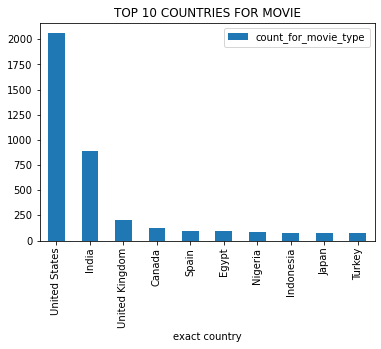

In [53]:

movie.plot(kind='bar',x="exact country",title="TOP 10 COUNTRIES FOR MOVIE")

<AxesSubplot:title={'center':'TOP 10 COUNTRIES FOR TV_SHOW'}, xlabel='exact country'>

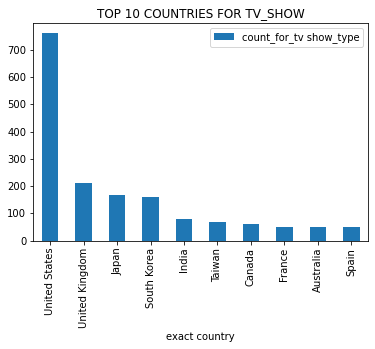

In [54]:
tv_show.plot(kind='bar',x="exact country",title="TOP 10 COUNTRIES FOR TV_SHOW")

In [55]:
## most release duration for each type

In [56]:
duratype=net[["duration","type"]]
movie=duratype.where(duratype["type"]=="Movie")
tv_show=duratype.where(duratype["type"]=="TV Show")

movie=movie["duration"].value_counts()[:5]
movie=pd.DataFrame(movie)
movie=movie.rename_axis("exact duration").reset_index()
movie["type"]= "movie"
movie["number of release"]=movie["duration"]
movie=movie.drop("duration", axis="columns")

tv_show=tv_show["duration"].value_counts()[:5]
tv_show=pd.DataFrame(tv_show)
tv_show=tv_show.rename_axis("exact duration").reset_index()
tv_show["type"]="TV Show"
tv_show["number of release"]=tv_show["duration"]
tv_show=tv_show.drop("duration", axis="columns")
print(movie)
print(tv_show)

  exact duration   type  number of release
0         90 min  movie                152
1         97 min  movie                146
2         94 min  movie                146
3         93 min  movie                146
4         91 min  movie                144
  exact duration     type  number of release
0       1 Season  TV Show               1793
1      2 Seasons  TV Show                425
2      3 Seasons  TV Show                199
3      4 Seasons  TV Show                 95
4      5 Seasons  TV Show                 65


<AxesSubplot:title={'center':'TOP 5 MOST RELEASED MOVIE DURATION'}, xlabel='exact duration'>

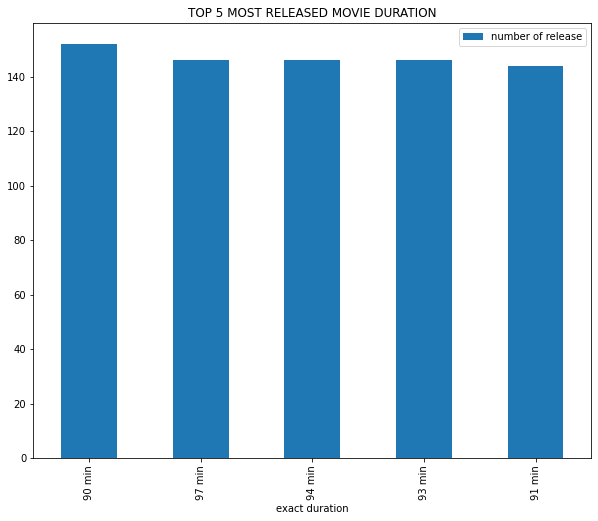

In [57]:
movie.plot(kind='bar',x="exact duration",title="TOP 5 MOST RELEASED MOVIE DURATION",figsize=(10,8))

<AxesSubplot:title={'center':'TOP 5 MOST RELEASED TV SHOW DURATION'}, xlabel='exact duration'>

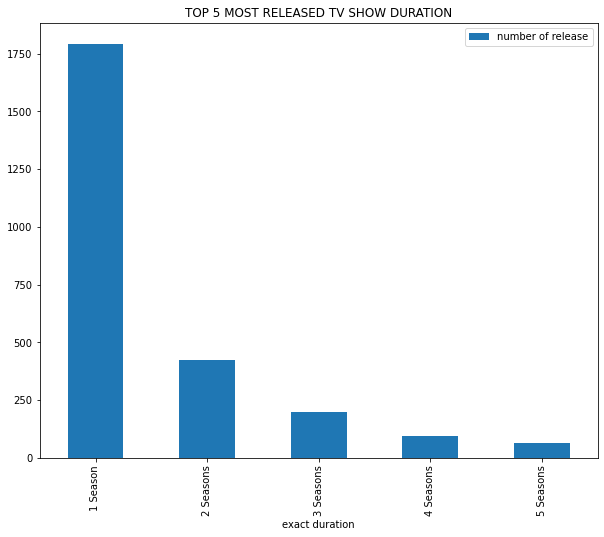

In [58]:
tv_show.plot(kind='bar',x="exact duration",title="TOP 5 MOST RELEASED TV SHOW DURATION",figsize=(10,8))

movie produced by rating

In [59]:
movrating=net[["type","rating"]]
movie=movrating.where(duratype["type"]=="Movie")
tv_show=movrating.where(duratype["type"]=="TV Show")

movie=movie["rating"].value_counts()[:5]
movie=pd.DataFrame(movie)
movie=movie.rename_axis("ratings").reset_index()
movie["number of rating"]=movie["rating"]
movie=movie.drop("rating", axis="columns")


tv_show=tv_show["rating"].value_counts()[:5]
tv_show=pd.DataFrame(tv_show)
tv_show=tv_show.rename_axis("ratings").reset_index()
tv_show["number of rating"]=tv_show["rating"]
tv_show=tv_show.drop("rating", axis="columns")


<AxesSubplot:title={'center':'TOP 5 MOVIE RATINGS'}, xlabel='ratings'>

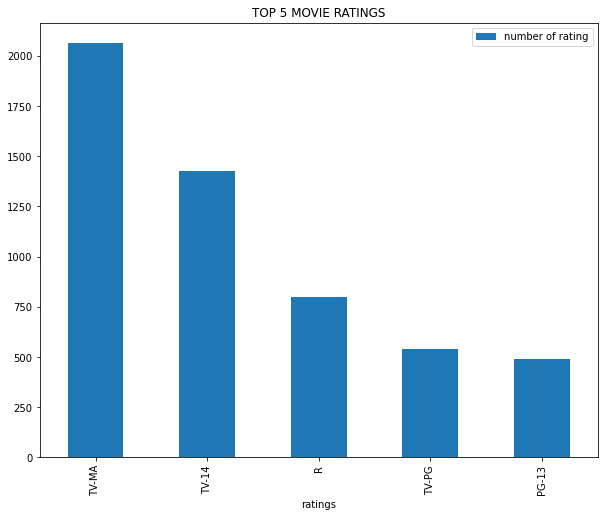

In [60]:
movie.plot(kind='bar',x="ratings",title="TOP 5 MOVIE RATINGS",figsize=(10,8))

<AxesSubplot:title={'center':'TOP 5 TV SHOW RATINGS'}, xlabel='ratings'>

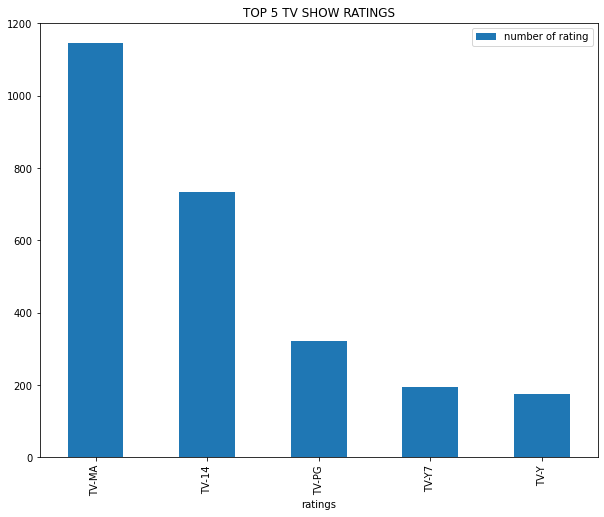

In [61]:
tv_show.plot(kind='bar',x="ratings",title="TOP 5 TV SHOW RATINGS",figsize=(10,8))

In [62]:
## CONSIDERING THE "UNITED STATES"  AND "INDIA" WHERE MOVIE ARE BEING PRODUCED MOST.

In [63]:
us= net.where (net["country"]=="United States")
india= net.where(net["country"]=="India")


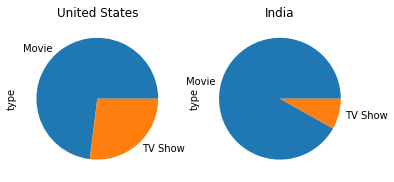

In [64]:
plt.subplot(1,2,1)
us["type"].value_counts().plot(kind='pie')
plt.title("United States")
plt.subplot(1,2,2)
india["type"].value_counts().plot(kind='pie')
plt.title("India")

plt.show()

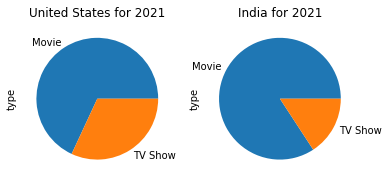

In [65]:
plt.subplot(1,2,1)
us["type"].where(us["year"]==2021.0).value_counts().plot(kind='pie')
plt.title("United States for 2021")
plt.subplot(1,2,2)
india["type"].where(india["year"]==2021.0).value_counts().plot(kind='pie')
plt.title("India for 2021")
plt.show()